In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch as torch
import torch.nn as nn

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from google.colab import files # 11mins
uploaded = files.upload()

Saving df1_sampledata.csv to df1_sampledata.csv
Saving df2_sampledata.csv to df2_sampledata.csv
Saving targets_sampledata.csv to targets_sampledata.csv


In [5]:
input_x1 = pd.read_csv('df1_sampledata.csv')
input_x2 = pd.read_csv('df2_sampledata.csv')
target_y = pd.read_csv('targets_sampledata.csv')

# Drop the first column
input_x1 = input_x1.drop(input_x1.columns[0], axis=1)
input_x2 = input_x2.drop(input_x2.columns[0], axis=1)

# Convert to numpy
input_x1 = input_x1.to_numpy()
input_x2 = input_x2.to_numpy()
target_y = target_y.to_numpy()

print(input_x1.shape)
print(input_x2.shape)
print(target_y.shape)



(350000, 24)
(350000, 24)
(350000, 1)


In [6]:
# make a neural network with 1 hidden layer using pytorch
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(24, 16)
        self.fc2 = nn.Linear(16, 9)
        self.fc3 = nn.Linear(9, 3)
        self.fc4 = nn.Linear(3, 1)
        self.sigmoid = nn.Sigmoid()
        self.relu = nn.ReLU()
        self.criterion = nn.MSELoss()
        self.optimizer = torch.optim.SGD(self.parameters(), lr=0.01)



    def forward(self, x1, x2):
        # Element-wise subtraction
        x = x1 - x2
        # Forward pass with shared weights
        x = self.sigmoid(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        x = self.fc4(x)
        return x

    def loss(self, output, target):
        return self.criterion(output, target)

    def backward(self, loss):
        loss.backward()

    def train(self, x1, x2, target):
        # Forward pass
        output = self.forward(x1, x2)
        # Compute the loss
        loss = self.loss(output, target)
        # Zero the gradients
        self.optimizer.zero_grad()
        # Backward pass
        self.backward(loss)
        # Update the weights
        self.optimizer.step()
        return loss



In [7]:
error = {}
model = Net()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
for epoch in range(3):  # Adjust epochs as needed: 3 epochs takes 27 minutes
  for j in range(len(input_x1)):
    # Move data to GPU (if available)
    x1 = torch.tensor(input_x1[j], dtype=torch.float32)
    x2 = torch.tensor(input_x2[j], dtype=torch.float32)
    target = torch.tensor(target_y[j], dtype=torch.float32)


    x1 = x1.to(device)
    x2 = x2.to(device)
    targets = target.to(device)

    model.train(x1, x2, targets)
  error[epoch] = model.loss(model.forward(x1, x2), targets).item()
  print(error[epoch])



8.01294208940817e-06
5.2688824325741734e-06
3.791449671552982e-06


# Results of training

In [8]:
uploaded = files.upload()

Saving characters.csv to characters.csv


In [9]:
chars = pd.read_csv('characters.csv') #TODO change this to 'characters.csv'

In [10]:
chars

,Unnamed: 0,Man,Woman,Pregnant,Stroller,OldMan,OldWoman,Boy,Girl,Homeless,...,LargeMan_ill,Criminal_ill,MaleExecutive_ill,FemaleExecutive_ill,FemaleAthlete_ill,MaleAthlete_ill,FemaleDoctor_ill,MaleDoctor_ill,Dog_ill,Cat_ill
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,9,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
rank = []
labels = []
c = chars.columns[1:]
for char in c:
  rank.append(chars[char].tolist())
  labels.append(char)

print(rank)
print(labels)


[[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.

In [12]:
ranks = {}
for i in range(len(labels)):
  t1 = rank[i]
  t2 = np.zeros(24)

  t1 = torch.tensor(t1, dtype=torch.float32)
  t2 = torch.tensor(t2, dtype=torch.float32)

  t1 = t1.to(device)
  t2 = t2.to(device)
  m = float(model.forward(t1,t2))
  ranks[labels[i]] = m

print(ranks)




{'Man': 0.4971211552619934, 'Woman': 0.4971883296966553, 'Pregnant': 0.5007349848747253, 'Stroller': 0.5052976608276367, 'OldMan': 0.497270405292511, 'OldWoman': 0.49914872646331787, 'Boy': 0.49856051802635193, 'Girl': 0.4977147579193115, 'Homeless': 0.4967207610607147, 'LargeWoman': 0.49411723017692566, 'LargeMan': 0.49923762679100037, 'Criminal': 0.49835172295570374, 'MaleExecutive': 0.49899938702583313, 'FemaleExecutive': 0.5010603070259094, 'FemaleAthlete': 0.49758508801460266, 'MaleAthlete': 0.49674302339553833, 'FemaleDoctor': 0.500615656375885, 'MaleDoctor': 0.49687695503234863, 'Dog': 0.4969531297683716, 'Cat': 0.49833589792251587, 'Man_ill': 0.49611896276474, 'Woman_ill': 0.496182382106781, 'Pregnant_ill': 0.49960529804229736, 'Stroller_ill': 0.5042266845703125, 'OldMan_ill': 0.4962635040283203, 'OldWoman_ill': 0.4981537461280823, 'Boy_ill': 0.4976327121257782, 'Girl_ill': 0.49673354625701904, 'Homeless_ill': 0.49561479687690735, 'LargeWoman_ill': 0.4931159019470215, 'LargeMan

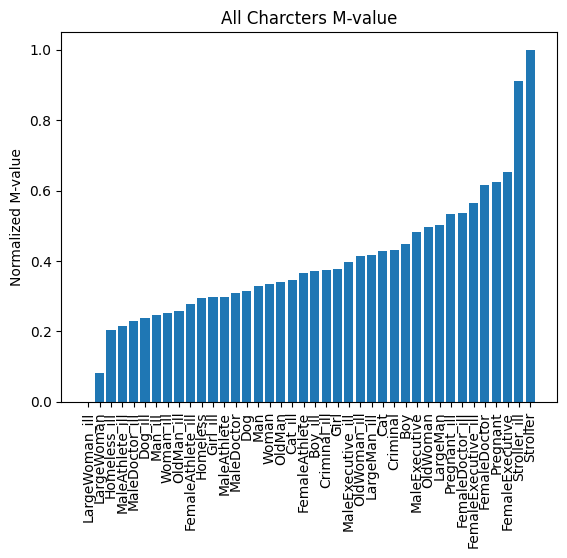

In [15]:
sorted_d = sorted(ranks.items(), key=lambda x: x[1])

x = [i[1] for i in sorted_d]
labels = [i[0] for i in sorted_d]

x = np.array(x)
x1 = x - x.min()
x1 = x1 / x1.max()


plt.bar(labels, x1)
plt.ylabel('Normalized M-value')
plt.title('All Charcters M-value')

plt.xticks(rotation=90)
plt.show()




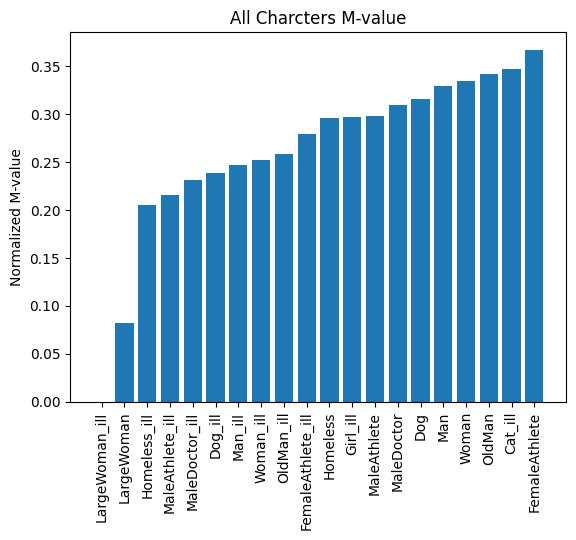

In [16]:
sorted_d = rank
x = [i[1] for i in sorted_d]
labels = [i[0] for i in sorted_d]

x = np.array(x)
x1 = x - x.min()
x1 = x1 / x1.max()



plt.bar(labels, x1)
plt.ylabel('Normalized M-value')
plt.title('All Charcters M-value')

plt.xticks(rotation=90)
plt.show()

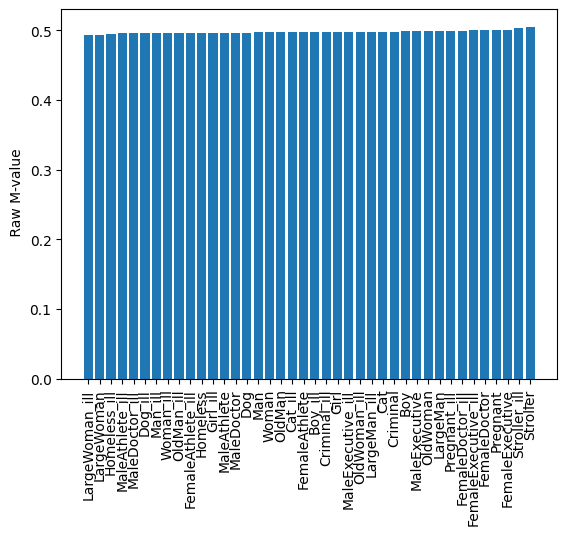

In [14]:
plt.bar(labels, x)
plt.ylabel(' Raw M-value')

plt.xticks(rotation=90)
plt.show()